In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "data.txt"

data = pd.read_csv(filename, sep='\t', header=None, names = ["pressure, kPa", "Thickness, mm"], dtype = {'pressure, kPa':np.str, "Thickness, mm":np.str})

In [3]:
data['pressure, kPa'] = data['pressure, kPa'].astype('str') 
data['pressure, kPa'] = data['pressure, kPa'].str.replace(',','.')
data["Thickness, mm"] = data["Thickness, mm"].astype('str') 
data["Thickness, mm"] = data["Thickness, mm"].str.replace(',','.')



In [4]:
data['pressure, kPa'] = pd.to_numeric(data['pressure, kPa'])
data["Thickness, mm"] = pd.to_numeric(data["Thickness, mm"])

In [5]:
data

,"pressure, kPa","Thickness, mm"
0,0.80,2.443866
1,0.80,2.835245
2,1.00,2.404647
3,1.62,1.530678
4,1.62,1.345380
5,1.62,1.427326
6,1.62,1.402286
7,1.62,1.545898
8,2.00,1.232955
9,2.00,1.077796


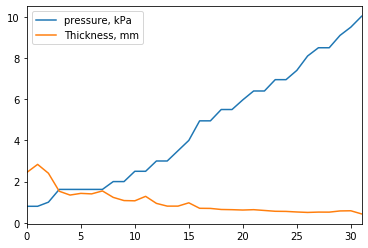

In [6]:
data.plot()

In [7]:
data["Thickness, mm"].values

array([2.44386597, 2.83524517, 2.40464683, 1.53067843, 1.34537978,
       1.42732645, 1.40228563, 1.54589754, 1.23295464, 1.07779618,
       1.06609627, 1.28327063, 0.94106512, 0.80836397, 0.80836397,
       0.96862071, 0.70262087, 0.69687019, 0.6450537 , 0.63524377,
       0.61817768, 0.63548073, 0.59715609, 0.55789781, 0.55154   ,
       0.5237232 , 0.50198506, 0.5183147 , 0.51604006, 0.57426742,
       0.58237949, 0.4297101 ])

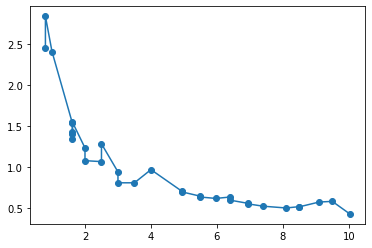

In [8]:
plt.plot(data['pressure, kPa'].values, data["Thickness, mm"].values, "-o")
# data['pressure, kPa'] = data['pressure, kPa'].str.replace(',','.')
# data["Thickness, mm"] = data["Thickness, mm"].astype('str')

In [9]:
df=data.groupby(['pressure, kPa']).agg({"Thickness, mm":"mean"}).reset_index().copy()
df

,"pressure, kPa","Thickness, mm"
0,0.80,2.639556
1,1.00,2.404647
2,1.62,1.450314
3,2.00,1.155375
4,2.50,1.174683
5,3.00,0.874715
6,3.50,0.808364
7,4.00,0.968621
8,4.95,0.699746
9,5.50,0.640149


Text(0.5, 1.0, 'LumCathode layers thickness mm')

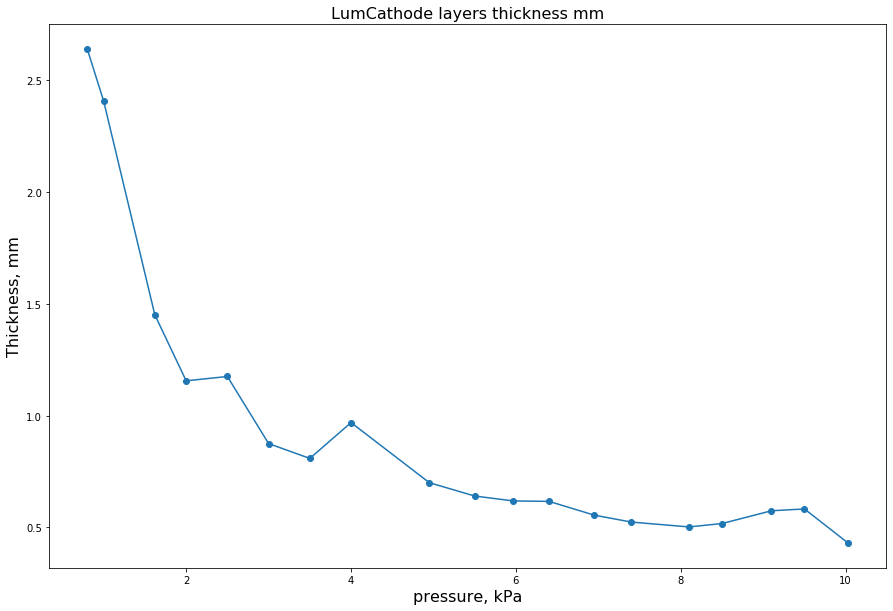

In [10]:
plt.subplots(figsize=(15,10))
# plt.title('LumCathode layers thickness mm')
plt.plot(df['pressure, kPa'].values, df["Thickness, mm"].values, "-o")
plt.xlabel('pressure, kPa',fontsize=16)
plt.ylabel('Thickness, mm',fontsize=16)
plt.title('LumCathode layers thickness mm', fontsize=16)
# plt.title('LumCathode layers thickness mm')

# Fitting by exp

In [11]:
from scipy.optimize import curve_fit
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def my_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

In [12]:
xdata = df['pressure, kPa'].values
ydata = df["Thickness, mm"].values

In [13]:
popt, pcov = curve_fit(my_exp, xdata, ydata)

In [14]:
pcov

array([[0.12222615, 0.02477075, 0.00344847],
       [0.02477075, 0.00645316, 0.00153112],
       [0.00344847, 0.00153112, 0.00116921]])

In [15]:
popt

array([4.06514203, 0.84739172, 0.5696529 ])

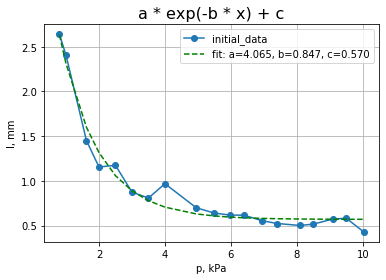

In [16]:
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

plt.plot(xdata, ydata, 'o-', label='initial_data')
plt.plot(xdata, my_exp(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.title("a * exp(-b * x) + c", fontsize=16)

# plt.xscale('log')
plt.grid(True)

plt.xlabel('p, kPa')
plt.ylabel('l, mm')
plt.legend()

# Test Exp

/home/irebri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


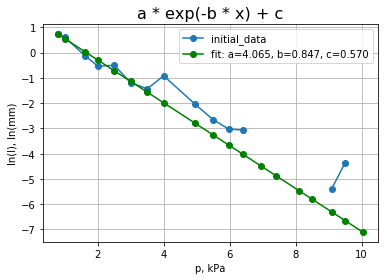

In [17]:
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
logy=np.log(ydata-popt[2])
my_logy=np.log(my_exp(xdata, *popt) - popt[2])

plt.plot(xdata, logy, 'o-', label='initial_data')
plt.plot(xdata, my_logy, 'go-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.title("a * exp(-b * x) + c", fontsize=16)

# plt.xscale('log')
plt.grid(True)

plt.xlabel('p, kPa')
plt.ylabel('ln(l), ln(mm)')
plt.legend()

<br><br><br><br><br><br><br><br><br><br><br><br><br>
# Let's make more scientifically strict

In [18]:
# https://stackoverflow.com/questions/54364920/adding-std-deviation-to-mean-of-pandas-groupby-object
def mean_error(x):
    return x.std() / np.sqrt(len(x))
df1 = data.groupby('pressure, kPa').agg(['mean', mean_error]).fillna(0)
df1


Thickness, mm           
                       mean mean_error
pressure, kPa                         
0.80               2.639556   0.195690
1.00               2.404647   0.000000
1.62               1.450314   0.038367
2.00               1.155375   0.077579
2.50               1.174683   0.108587
3.00               0.874715   0.066351
3.50               0.808364   0.000000
4.00               0.968621   0.000000
4.95               0.699746   0.002875
5.50               0.640149   0.004905
5.97               0.618178   0.000000
6.40               0.616318   0.019162
6.95               0.554719   0.003179
7.40               0.523723   0.000000
8.10               0.501985   0.000000
8.50               0.517177   0.001137
9.10               0.574267   0.000000
9.50               0.582379   0.000000
10.03              0.429710   0.000000

In [19]:
df1.columns = df1.columns.map('_'.join)
df1 = df1.reset_index()
df1

,"pressure, kPa","Thickness, mm_mean","Thickness, mm_mean_error"
0,0.80,2.639556,0.195690
1,1.00,2.404647,0.000000
2,1.62,1.450314,0.038367
3,2.00,1.155375,0.077579
4,2.50,1.174683,0.108587
5,3.00,0.874715,0.066351
6,3.50,0.808364,0.000000
7,4.00,0.968621,0.000000
8,4.95,0.699746,0.002875
9,5.50,0.640149,0.004905


Text(0.5, 1.0, 'LumCathode layers thickness mm')

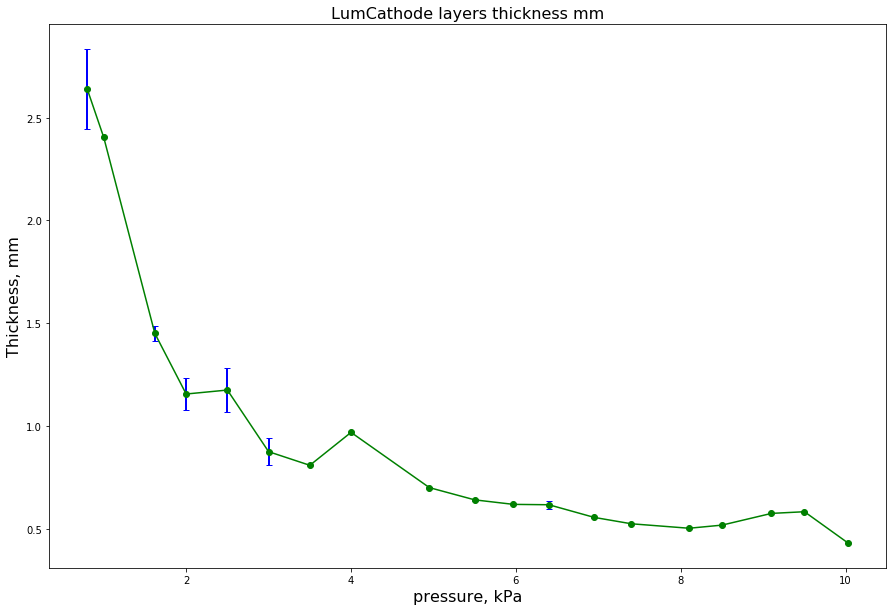

In [26]:
plt.subplots(figsize=(15,10))
# plt.title('LumCathode layers thickness mm')

xdata = df1['pressure, kPa'].values
ydata = df1["Thickness, mm_mean"].values
my_error = df1["Thickness, mm_mean_error"].values

plt.errorbar(xdata, ydata, yerr = my_error,capsize=3, elinewidth=2, fmt="g-o", ecolor="blue")


plt.xlabel('pressure, kPa',fontsize=16)
plt.ylabel('Thickness, mm',fontsize=16)
plt.title('LumCathode layers thickness mm', fontsize=16)
# plt.title('LumCathode layers thickness mm')

In [21]:
len(ydata)

19

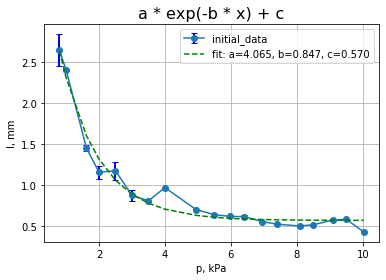

In [28]:
plt.errorbar(x=xdata, y=ydata, yerr = my_error, fmt='o-', label='initial_data', ecolor="blue",capsize=3, elinewidth=2)
plt.errorbar(x=xdata, y=my_exp(xdata, *popt), fmt='g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.title("a * exp(-b * x) + c", fontsize=16)

# plt.xscale('log')
plt.grid(True)

plt.xlabel('p, kPa')
plt.ylabel('l, mm')
plt.legend()